# 实验二  预处理与可视化
### 实验目的
+ 学习使用numpy模块进行数据预处理；
+ 学习使用Matplotlib模块进行数据可视化；
### 实验要求
+ 请在实验报告中说明以上两步操作的依据或思路；
+ 请上传代码与处理后的数据，连同实验报告一起打包；
### 实验报告
实验完成后要求提交 **实验报告** 与 **相应的实验结果**
将实验报告和相关实验结果打包上传至服务器上相关目录下：
> /上传作业/刘昆宏/数据挖掘/实验2/ 

实验报告请在实验完成后*第二个双周周日前*上传


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 实验内容1 数据预处理
1. 读取horse-colic.data数据文件，根据horse-colic.names文件中对属性的说明进行缺失值填充；
2. 根据需要，对相关属性进行数据归一化操作；


### 1. 对`horse-colic.names`文件进行分析，整理出数据字典

In [3]:
# 数据字典
data_dict = {
    'surgery?': 'category',
    'Age':'category',
    'Hospital Number':'int64',
    'rectal temperature':'float64',
    'pulse':'float64',
    'respiratory rate':'float64',
    'temperature of extremities':'float64',
    'peripheral pulse':'category',
    'mucous membranes':'category',
    'capillary refill time':'category',
    'pain':'category',
    'peristalsis':'category',
    'abdominal distension':'category',
    'nasogastric tube':'category',
    'nasogastric reflux':'category',
    'nasogastric reflux PH':'float64',
    'rectal examination - feces':'category',
    'abdomen':'category',
    'packed cell volume':'float64',
    'total protein':'float64',
    'abdominocentesis appearance':'category',
    'abdomcentesis total protein':'float64',
    'outcome':'category',
    'surgical lesion?':'category',
    'type of lesion 1':'object',
    'type of lesion 2':'object',
    'type of lesion 3':'object',
    'cp_data':'category'
}
# 列名
col_name = list(data_dict.keys())
assert len(col_name) == 28

### 2. 通过`d.read_table`方法读取文件`horse-colic.data`

In [4]:
# 读取文件
df = pd.read_table(
    'horse-colic.data',
    sep=' ',
    header=None,
    na_values='?',
    names=col_name,
    dtype=data_dict
)
df

,surgery?,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,type of lesion 1,type of lesion 2,type of lesion 3,cp_data
0,2,1,530101,38.5,66.0,28.0,3.0,3,NaN,2,...,45.0,8.4,NaN,NaN,2,2,11300,00000,00000,2
1,1,1,534817,39.2,88.0,20.0,NaN,NaN,4,1,...,50.0,85.0,2,2.0,3,2,02208,00000,00000,2
2,2,1,530334,38.3,40.0,24.0,1.0,1,3,1,...,33.0,6.7,NaN,NaN,1,2,00000,00000,00000,1
3,1,9,5290409,39.1,164.0,84.0,4.0,1,6,2,...,48.0,7.2,3,5.3,2,1,02208,00000,00000,1
4,2,1,530255,37.3,104.0,35.0,NaN,NaN,6,2,...,74.0,7.4,NaN,NaN,2,2,04300,00000,00000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,NaN,120.0,70.0,4.0,NaN,4,2,...,55.0,65.0,NaN,NaN,3,2,03205,00000,00000,2
296,2,1,527702,37.2,72.0,24.0,3.0,2,4,2,...,44.0,NaN,3,3.3,3,1,02208,00000,00000,1
297,1,1,529386,37.5,72.0,30.0,4.0,3,4,1,...,60.0,6.8,NaN,NaN,2,1,03205,00000,00000,2
298,1,1,530612,36.5,100.0,24.0,3.0,3,3,1,...,50.0,6.0,3,3.4,1,1,02208,00000,00000,1


### 3. 对缺失值进行处理。
1. 抛弃过多缺失值的样本(缺失率大于10%，则抛弃该行)
2. 对于数值型缺失值，用均值填充，这样选择的原因是考虑之后的归一化
3. 对于类别型，保留NaN

In [5]:
# the threshold of non_null values
threshold = int(df.shape[1] * 0.9)
df.dropna(thresh=threshold, inplace=True)
df.fillna(df.mean(), inplace=True)

### 4. 分析需要归一化的列，并对其逐一归一化
由于在上面分析数据字典时，已经对需要归一化的 **数值类** 数据定义成了 *float64* 类型，所以只需要提取出它们的key就能生成待归一化列的列表

In [6]:
def z_score_normalize(series):
    '''
    Params:  a pandas serious

    Return: normalized version of the series
    '''
    return (series-series.mean())/series.std()

In [7]:
# 需要归一化的列表
to_be_normalized_cols = [col for col in col_name if data_dict[col] == 'float64']

# 对收集的列进行归一化操作
print('columns normalized:\n')
for col in to_be_normalized_cols:
    print('\t' + col)
    df[col] = z_score_normalize(df[col])

df


columns normalized:

	rectal temperature
	pulse
	respiratory rate
	temperature of extremities
	nasogastric reflux PH
	packed cell volume
	total protein
	abdomcentesis total protein


,surgery?,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,type of lesion 1,type of lesion 2,type of lesion 3,cp_data
3,1,9,5290409,1.325443,3.438687,3.604067,1.556118,1,6,2,...,0.166467,-0.557278,3,1.420470e+00,2,1,02208,00000,00000,1
6,1,1,526802,-0.288565,-0.894983,-0.870645,-1.210314,1,1,1,...,-0.938943,-0.565061,NaN,-1.519482e-15,1,1,03124,00000,00000,2
10,1,1,528548,-0.019564,-0.222517,-1.133864,0.633974,3,5,1,...,-0.235500,-0.603973,2,2.571361e-01,1,1,02124,00000,00000,1
13,2,9,5291329,-0.154064,0.748823,-0.080990,-1.210314,1,2,1,...,-0.938943,-0.600082,1,-1.519482e-15,2,2,00000,00000,00000,1
14,1,1,534917,0.114937,0.151075,-0.080990,0.633974,1,1,1,...,-0.034517,2.314479,1,-8.377661e-01,1,1,02112,00000,00000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,1,1,528890,1.056442,0.300512,0.971883,0.633974,3,3,1,...,0.769418,-0.584517,3,-1.519482e-15,2,1,07111,00000,00000,2
292,1,1,530034,-1.499071,-0.222517,-0.607427,-1.210314,3,2,1,...,-1.139927,-0.568952,2,-1.519482e-15,2,1,31110,00000,00000,2
296,2,1,527702,-1.230070,0.001639,-0.344209,0.633974,2,4,2,...,-0.235500,0.000000,3,5.184196e-02,3,1,02208,00000,00000,1
297,1,1,529386,-0.826568,0.001639,0.050619,1.556118,3,4,1,...,1.372369,-0.572843,NaN,-1.519482e-15,2,1,03205,00000,00000,2


### 5. 将预处理过的数据保存到文件`preprocessed.csv`中备用

In [8]:
df.to_csv('preprocess.csv')

## 实验内容二     数据可视化
+ 对iris.data进行可视化操作，分析各个属性在不同类别中分布是否有显著差异


### 1. 按照内容1的步骤进行数据预处理
由于任务仅仅需要可视化，为了直观，这里不进行归一化。

In [9]:
# 数据字典
data_dict_iris = {
    'Sepal.Length':'float64',
    'Sepal.Width':'float64',
    'Petal.Length':'float64',
    'Petal.Width':'float64',
    'Type':'object'
}
# 列名
col_name_iris = list(data_dict_iris.keys())
to_be_normalized_cols_iris = col_name_iris[:4]
assert len(col_name_iris) == 5
for c in to_be_normalized_cols_iris:
    assert data_dict_iris[c] == 'float64'

# 读取文件
df_iris = pd.read_table(
    'iris.data.txt',
    sep=',',
    header=None,
    names=col_name_iris,
    dtype=data_dict_iris
)
df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 2. 进行数据可视化
首先实现对某种类型的绘图逻辑

In [10]:
def plot_for_attributes(SL,SW,PL,PW,T):
    '''
    Params: lists of Sepal.Length, Sepal.Width, Petal.Length, Petal.Width of a given Type

    Return: None, but plot a figure
    '''
    plt.figure(figsize=(8,5))
    plt.title(T)

    plt.plot(np.arange(len(SL)), SL, label='Sepal.Length', color='red')
    plt.plot(np.arange(len(SW)), SW, label='Sepal.Width', color='yellow')
    plt.plot(np.arange(len(PL)), PL, label='Petal.Length', color='blue', linestyle='--')
    plt.plot(np.arange(len(PW)), PW, label='Petal.Width', color='green', linestyle='--')

    plt.xlabel('Individual NO.')
    plt.ylabel('cm.')

    plt.legend()
    plt.show()

为了实现类别对比，需要对datafram按照Type进行分割

对于每个子数据集，分别绘图

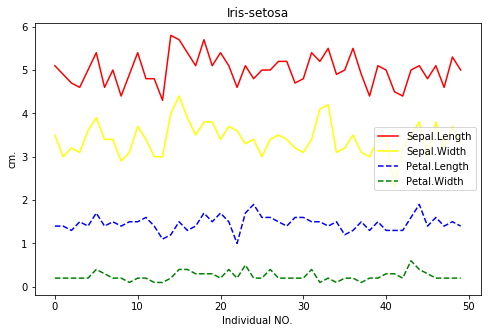

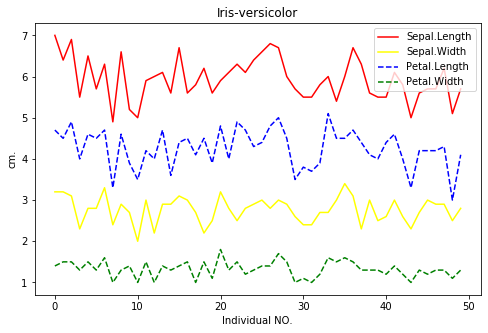

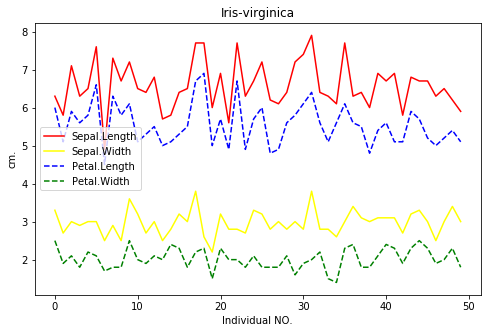

In [11]:
types = df_iris['Type'].drop_duplicates().tolist()
for type in types:
    data = df_iris.loc[df_iris['Type'] == type]
    SL = data['Sepal.Length']
    SW = data['Sepal.Width']
    PL = data['Petal.Length']
    PW = data['Petal.Width']
    plot_for_attributes(SL, SW, PL, PW, type)

### 结论
由上述三张图中可以看出，同一属性在不同的类别中分布差异较大。由于没有计算均值和方差，下面是从图片直观上感受到的分布情况：
+ **Sepal.Length**: setosa和versicolor方差类似，virginica方差偏大。总体方差较大。
+ **Sepal.Width**: setora均值明显高于其他两种，三种方差类似，总体方差中等。
+ **Petal.Length**: setosa均值和方差明显低于其他两种，方差较小。其他两种方差较大。
+ **Petal.Width**: 三种分布类似，方差总体较小，setosa相对而言方差更小。